In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colorbar import ColorbarBase

## Global Warming For the US

Problem Statement: We need to figure out how responsible the United States is in the total amount of carbon emissions in the world. This way, we can see how urgent it is for the US to set the example in enacting policies to decrease carbon emissions and help the planet. 

In [2]:
co2_emissions = pd.read_csv("co2_emissions_tonnes_per_person.csv")

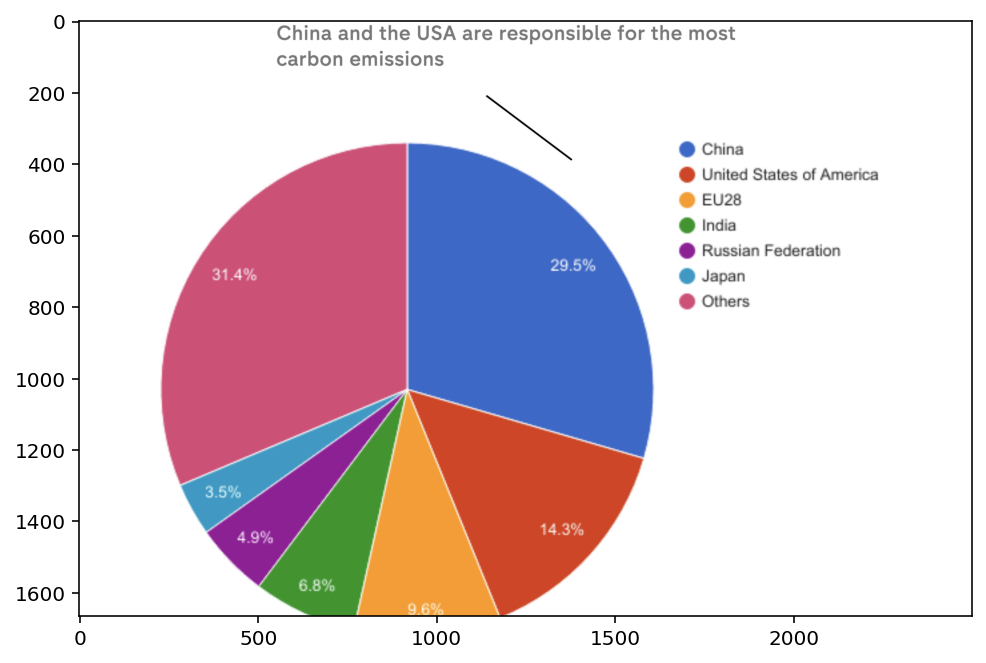

In [3]:
from PIL import Image

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

co2 = Image.open("pieChart.png")

ax.imshow(co2)

plt.show()

There are multiple problems with this pie chart. First of all, using a pie chart is not ideal since it is hard to visualize the differences in the amount each country emits carbon emissions. The comparisons are not easy visually and because of that, the visualizer has to rely on the numberical percentages on the pie chart. It feels like the visualizer would have to only rely on these numbers, rendering the whole pie chart as useless. Ignoring the numbers, it is hard to differentiate whether china or the US is more responsible for carbon emissions. Pie charts in general only show general ideas, but in order to tell a story, there needs to be more detailed comparisons, which can be done with more detailed bar graphs. In addition, it is not fair for China since they have way more people in the country, so of course they would have the most carbon emissions. It is better to compare carbon emissions per person in each country, to take into account how well policies on carbon emissions are working out and what countries to target to decrease carbon emissions in a particular country. 

In [4]:
def horiz_bar_graph(ax, df, xlabel, ylabel, xcol, ycol, shift, order): 
    ax.set_xlabel(xlabel, labelpad = 40, fontsize = 15)
    ax.set_ylabel(ylabel, rotation = 0, labelpad = 150, fontsize = 15)
    ax.tick_params(axis = "both", labelsize = 12)
    mean = np.mean(df[ycol])
    if order: 
        new_tbl = df.sort_values(ycol, ascending = False)
        new_tbl = new_tbl.iloc[:15].sort_values(ycol)
    else: 
        countries = ["China", "United States", "India", "Russa", "Japan"]
        new_tbl = df[(df[xcol] == "China") | (df[xcol] == "United States") | (df[xcol] == "India") | (df[xcol] == "Russia") |(df[xcol] == "Japan")]
        new_tbl = new_tbl.sort_values(ycol)
    new_tbl = new_tbl.reset_index()
    for i, row in new_tbl.iterrows(): 
        if row[xcol] == "United States": 
            col = "blue"
            ax.text(row[ycol] + shift, new_tbl.index[new_tbl[xcol] == "United States"][0], 
                    str(float(row[ycol])), color = "blue", fontweight = 'bold', verticalalignment = 'center', 
                    horizontalalignment = 'left', fontsize = 15)
        else: 
            col = "lightgrey"
        ax.barh(row[xcol], row[ycol], color = col)
    ax.axvline(mean, linewidth = 2, color = "tomato", linestyle='dashed')
    ax.axvline(0, linewidth = 3, color = "black")
    ax.text(mean + 0.2, len(new_tbl) - 0.5, "Mean CO2 emissions \nper person", color = "tomato", fontsize = 12, 
            horizontalalignment = 'left')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(.5)
    ax.spines['left'].set_linewidth(.5)

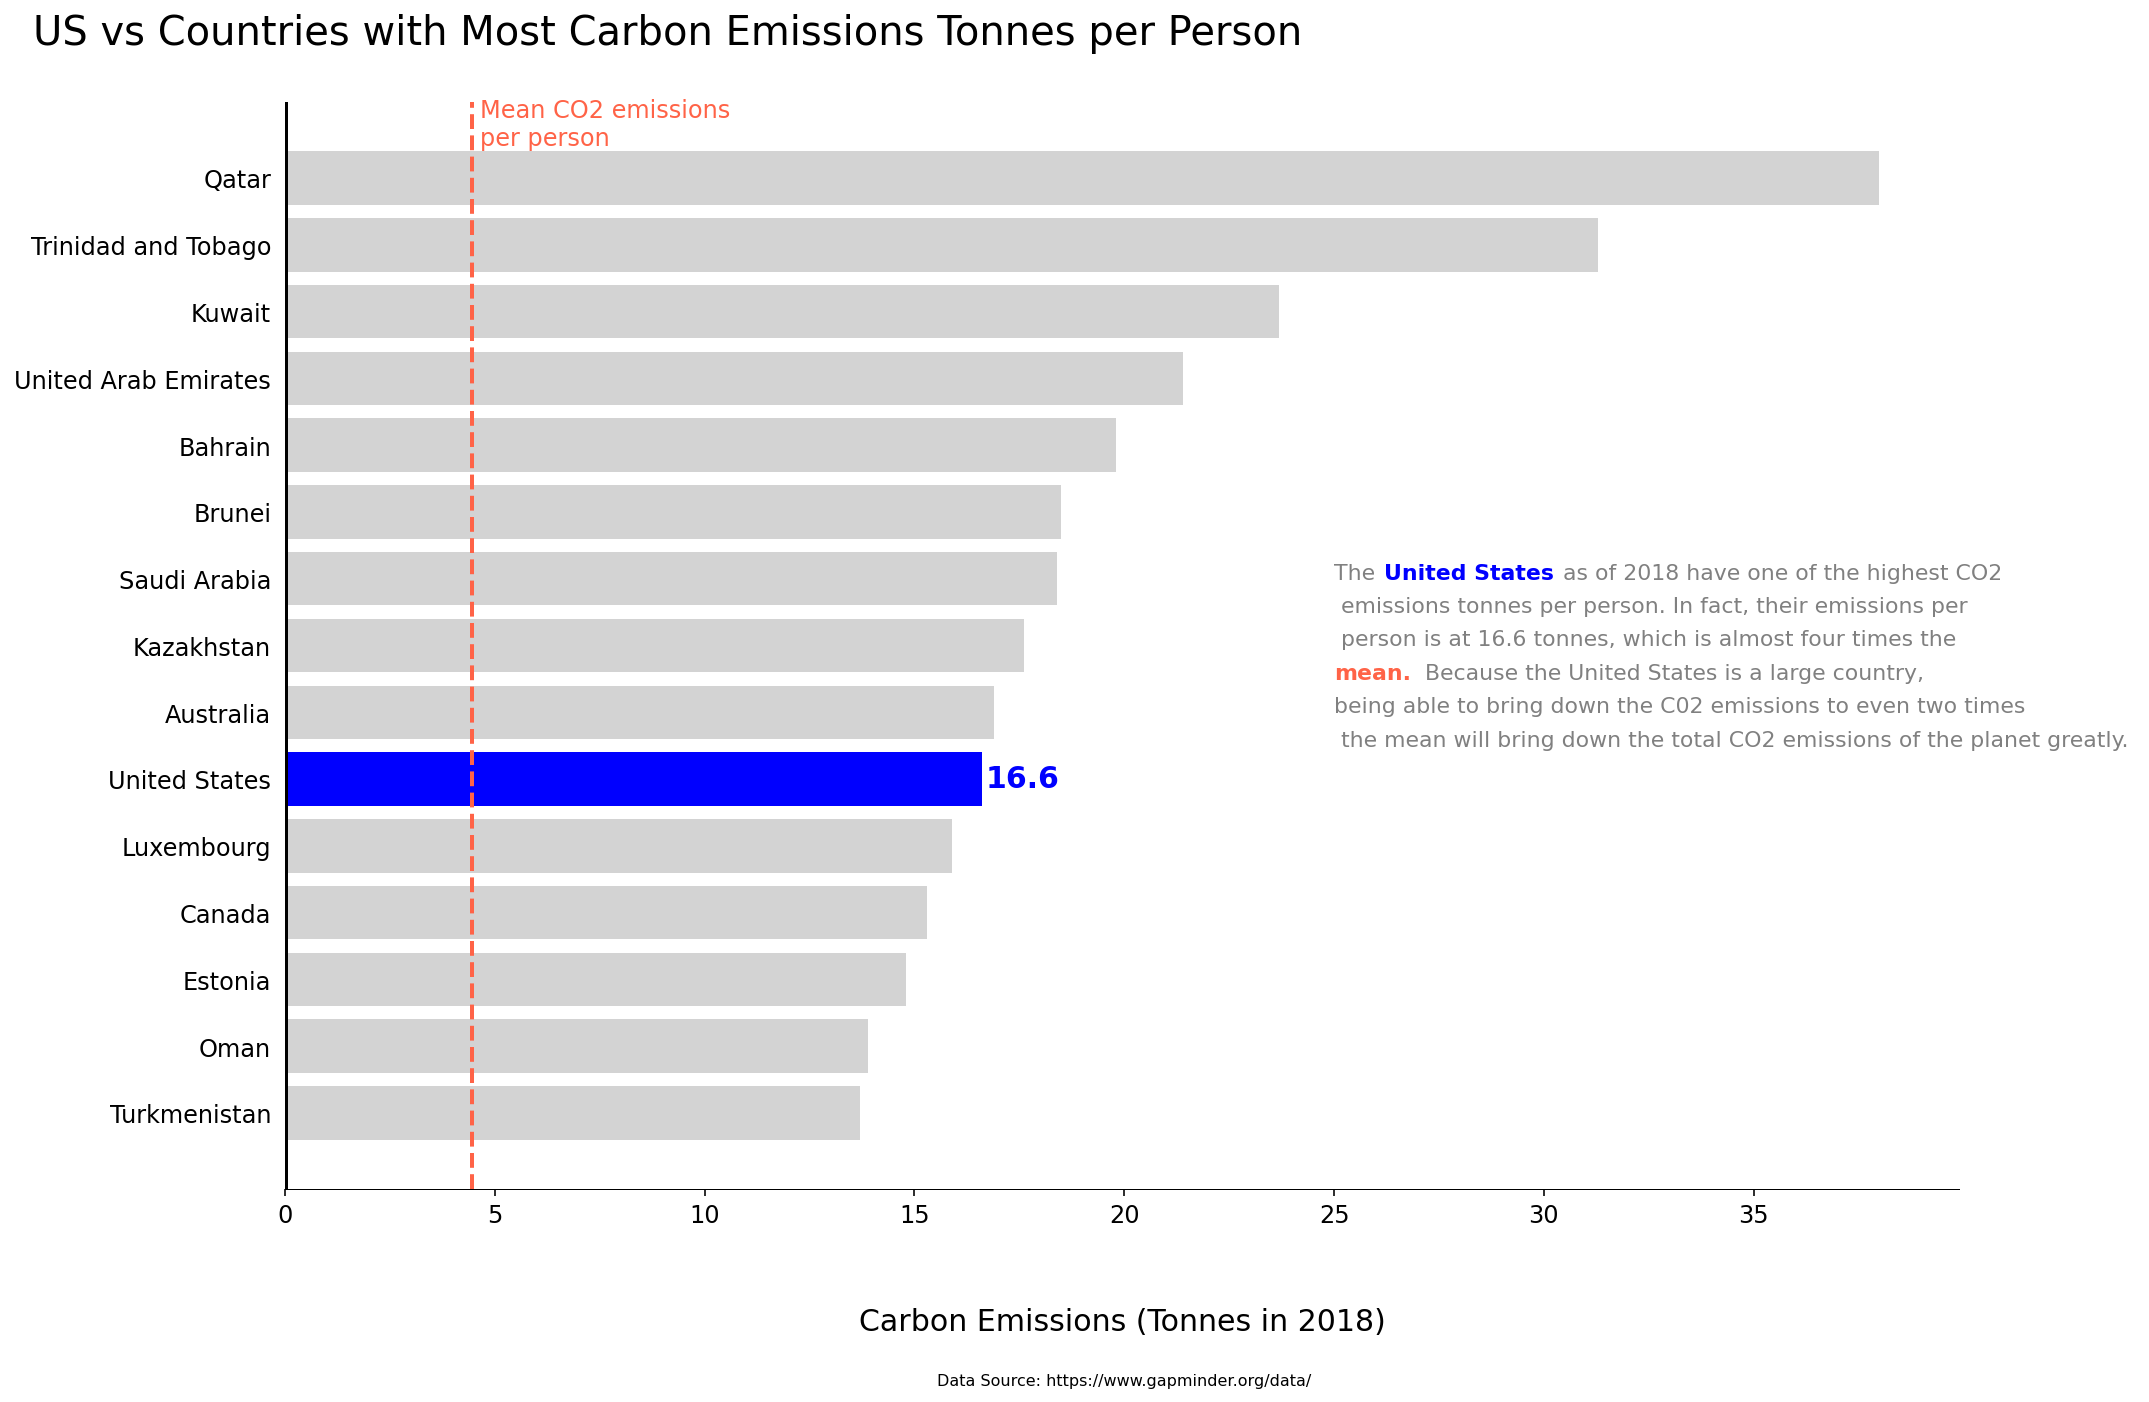

In [39]:
fig, ax = plt.subplots(figsize = (15, 10))

horiz_bar_graph(ax, co2_emissions,"Carbon Emissions (Tonnes in 2018)" , "", "country", "2018", 0.1, True)
ax.text(-6, 16, "US vs Countries with Most Carbon Emissions Tonnes per Person", fontsize = 20)
ax.text(25, 8, "The ", fontsize = 11, color = 'grey')
ax.text(26.2, 8, "United States", fontsize = 11, color = "blue", fontweight = 'bold')
ax.text(30.3, 8, " as of 2018 have one of the highest CO2", fontsize = 11, color = 'grey')
ax.text(25, 7.5, " emissions tonnes per person. In fact, their emissions per", fontsize = 11, color = 'grey')
ax.text(25, 7, " person is at 16.6 tonnes, which is almost four times the ", fontsize = 11, color = 'grey')
ax.text(25, 6.5, "mean.", fontsize = 11, color = "tomato", fontweight = 'bold')
ax.text(27, 6.5, " Because the United States is a large country, ", fontsize = 11, color = 'grey')
ax.text(25, 6, "being able to bring down the C02 emissions to even two times ", fontsize = 11, color = 'grey')
ax.text(25, 5.5, " the mean will bring down the total CO2 emissions of the planet greatly. ", fontsize = 11, color = 'grey')
ax.text(20, -4, "Data Source: https://www.gapminder.org/data/", horizontalalignment = 'center', 
        verticalalignment = 'center', fontsize = 8)
ax.yaxis.set_ticks_position('none') 

plt.show()

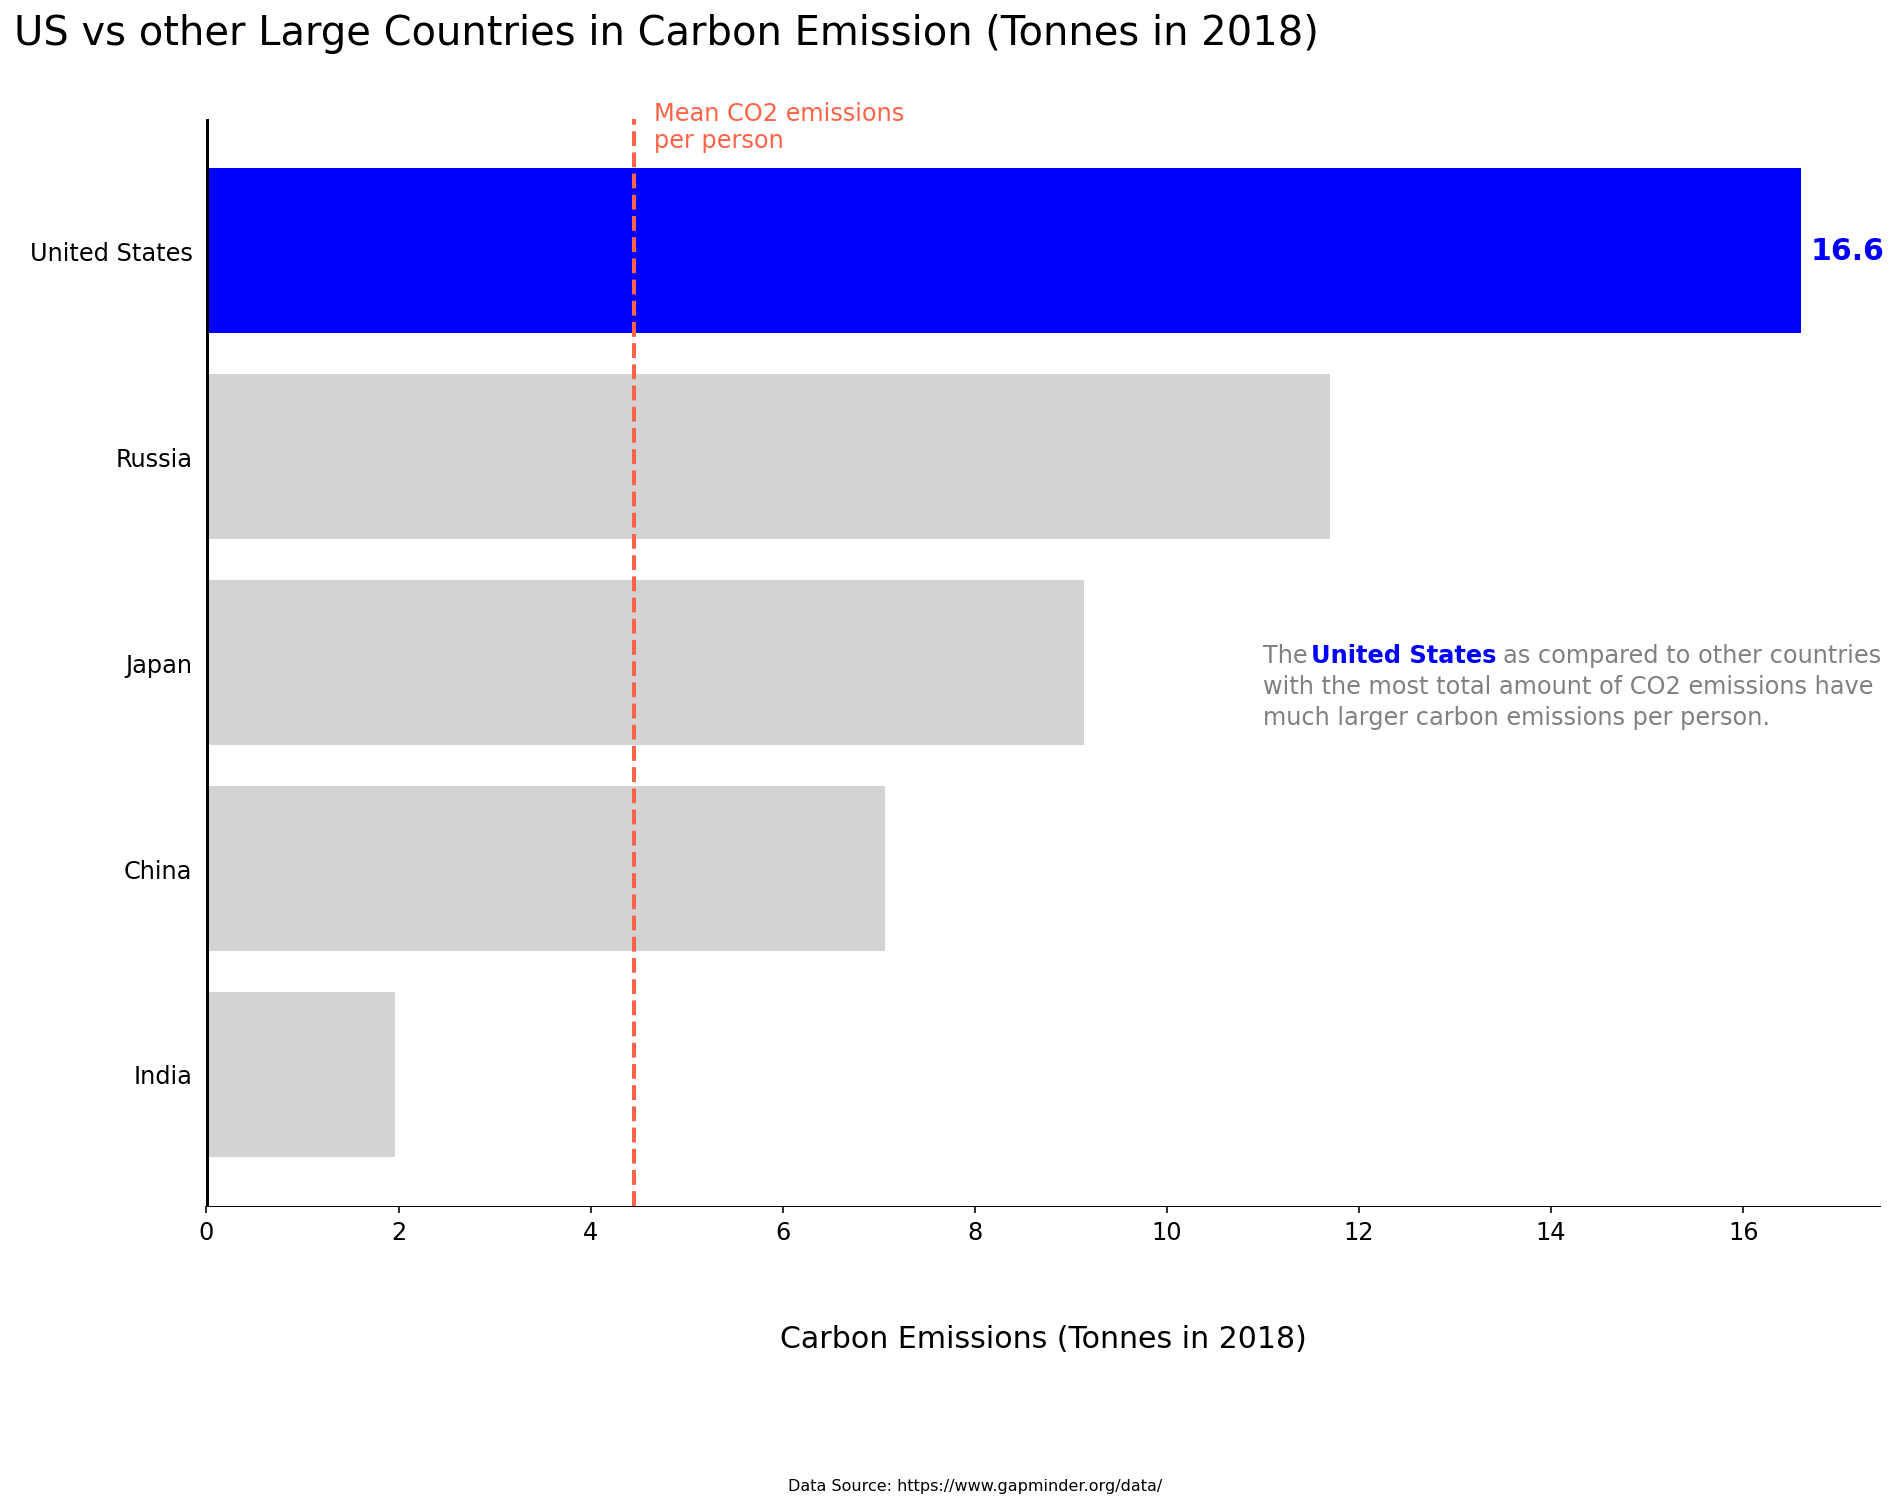

In [38]:
fig, ax = plt.subplots(figsize = (15, 10))

horiz_bar_graph(ax, co2_emissions, "Carbon Emissions (Tonnes in 2018)" , "", "country", "2018", 0.1, False)
ax.text(-2, 5, "US vs other Large Countries in Carbon Emission (Tonnes in 2018)", fontsize = 20)
ax.text(11, 2, "The ", fontsize = 12, color = "grey")
ax.text(11.5, 2, "United States ", color = "blue", fontsize = 12, fontweight = "bold")
ax.text(13.5, 2, "as compared to other countries", fontsize = 12, color = "grey")
ax.text(11, 1.85, "with the most total amount of CO2 emissions have ", fontsize = 12, color = 'grey')
ax.text(11, 1.7, "much larger carbon emissions per person. ", fontsize = 12, color = 'grey')
ax.yaxis.set_ticks_position('none')

ax.text(8, -2, "Data Source: https://www.gapminder.org/data/", horizontalalignment = 'center', 
        verticalalignment = 'center', fontsize = 8)

plt.show()

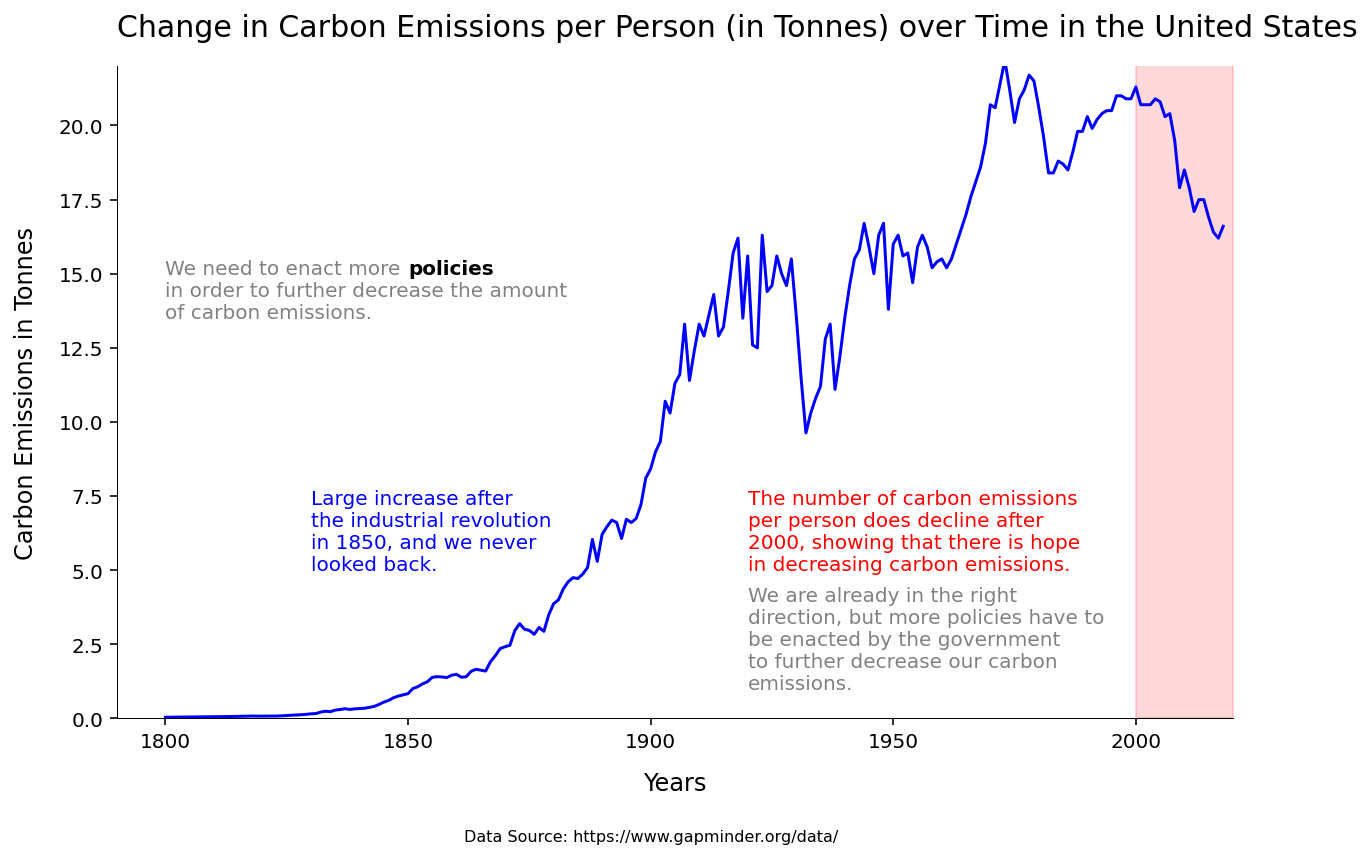

In [30]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.set_xlim(1790, 2020)
ax.set_ylim(0, 22)
us_vals = co2_emissions[co2_emissions['country'] == "United States"]
us_vals = us_vals.loc[:, ~us_vals.columns.isin(['country'])]
us_data = {
    "Years": np.array(us_vals.columns.astype(int)),
    "Values": us_vals.iloc[0].values
}
us = pd.DataFrame(us_data)
ax.text(1790, 23, "Change in Carbon Emissions per Person (in Tonnes) over Time in the United States", fontsize = 15)
ax.set_xlabel("Years", fontsize = 12, labelpad = 10)
ax.set_ylabel("Carbon Emissions in Tonnes", labelpad = 10, fontsize = 12)
ax.plot(us["Years"], us["Values"], color = "blue")
plt.fill_between([2000, 2020], [25, 25], 0,
                 facecolor="red", # The fill color
                 color='red',       # The outline color
                 alpha=0.15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.spines['left'].set_linewidth(.5)

ax.text(1920, 5
, "The number of carbon emissions \nper person does decline after \n2000, showing that there is hope \nin decreasing carbon emissions. ", 
       color = 'red')

text2 = "\nWe are already in the right \ndirection, but more policies have to \nbe enacted by the government \nto further decrease our carbon \nemissions."
ax.text(1920, 1
, text2, 
       color = 'grey')
text3 = "We need to enact more "
ax.text(1800, 15, text3, color = "grey")

ax.text(1850, 15, "policies", fontweight = "bold")
text5 = "in order to further decrease the amount \nof carbon emissions. "
ax.text(1800, 13.5, text5, color = "grey")

text4 = "Large increase after \nthe industrial revolution \nin 1850, and we never \nlooked back."
ax.text(1830, 5, text4, color = "blue")

ax.text(1900, -4, "Data Source: https://www.gapminder.org/data/", horizontalalignment = 'center', 
        verticalalignment = 'center', fontsize = 8)

plt.show()

## Democracy Around the World

Problem Statement: Investigating the Rise of Democracy in the 19th and 20th century. Also, investigate the shifts in political regimes from other types used throughout the 19th century to democracy later in the 20th century. 

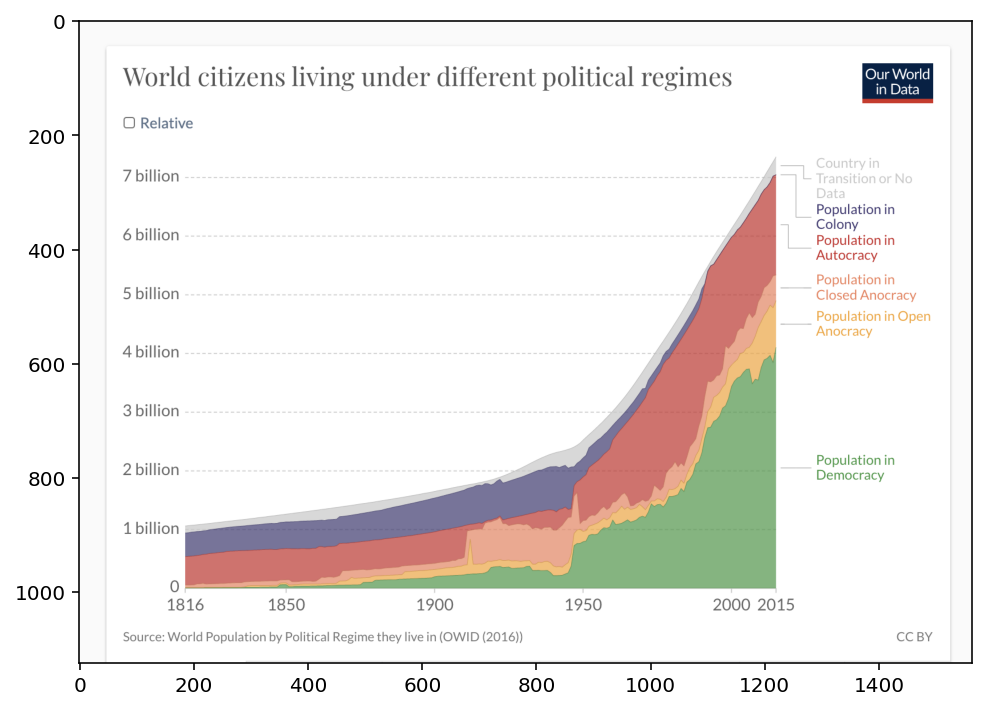

In [8]:
from PIL import Image

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))

co2 = Image.open("democracy.png")

ax.imshow(co2)

plt.show()

This graph above is flawed in many ways. First of all, it is hard to compare how many people were under what type
of government since the colors and lines are stacked. This type of stacked line plot, just like a stacked bar graph, is flawed since it is hard to provide a comparison of how many people lice in what type of government. Secondly, although we can see in color the percentage of people living in a certain political regime, it is still not ideal in seeing the percentage of the population at that time living in a particular political regime. Therefore, it is better for the visualizer to see explicitly the percentage of the population on the y-axis instead of just total population. Lastly, by focusing on two different time periods, the visualizer can see when the rest of the world (outside of the United States) went towards a democratic goverment as seen in the modified version of the graph below on highlighted regions. 

In [9]:
democracy = pd.read_csv("world-pop-by-political-regime.csv")
#democracy = democracy[democracy["Year"] >= 1950]
democracy = democracy.reset_index()
democracy.columns
democracy

,index,Year,Country in Transition or No Data (OWID (2016)),Population in Colony (OWID (2016)),Population in Autocracy (OWID (2016)),Population in Closed Anocracy (OWID (2016)),Population in Open Anocracy (OWID (2016)),Population in Democracy (OWID (2016))
0,0,1816,118729056,403637998,483991084,46128044,0,9243738
1,1,1817,119897024,403744053,487281542,46449658,0,9422669
2,2,1818,116963264,407212350,490595355,47546333,0,9605062
3,3,1819,117421120,408091621,493932466,47875230,0,9790987
4,4,1820,114607040,408251897,485091050,64430844,0,9980510
...,...,...,...,...,...,...,...,...
195,195,2011,223404096,0,1669571483,473350689,755008852,3892092080
196,196,2012,258480160,0,1679707351,438727280,804266753,3916319135
197,197,2013,268821088,0,1689364142,400758065,854319395,3968452243
198,198,2014,243861808,0,1698555299,541576022,933020422,3848772306


In [10]:
popn_total = pd.read_csv("population_total.csv")
popn_total = popn_total.loc[:, ~popn_total.columns.isin(['country'])]
popn_total = pd.DataFrame(popn_total.T.sum(axis = 1)).loc[np.arange(1816,2016).astype(str)]
popn_total = popn_total.reset_index()
popn_total.columns = ['year', 'population_total']

In [11]:
popn_total

,year,population_total
0,1816,1060852885
1,1817,1067176695
2,1818,1075852815
3,1819,1082323015
4,1820,1089784815
...,...,...
195,2011,7005766886
196,2012,7085153386
197,2013,7168619686
198,2014,7261636185


In [12]:
data = {
    "Year": democracy["Year"], 
    "Colony": np.round(democracy['Population in Colony (OWID (2016))'] / popn_total["population_total"], 3),
    "Autocracy": np.round(democracy['Population in Autocracy (OWID (2016))'] / popn_total["population_total"], 3),
    "Democracy": np.round(democracy['Population in Democracy (OWID (2016))'] / popn_total["population_total"], 3)
}
governs = pd.DataFrame(data)
governs.iloc[199]["Democracy"]

0.559

In [13]:
def plot_line(ax, ycol, color): 
    ax.plot(governs['Year'], governs[ycol], color = color)
    ax.text(2000, governs.iloc[199][ycol] + 0.07, "Population under " + ycol, fontsize = 12, color = color)

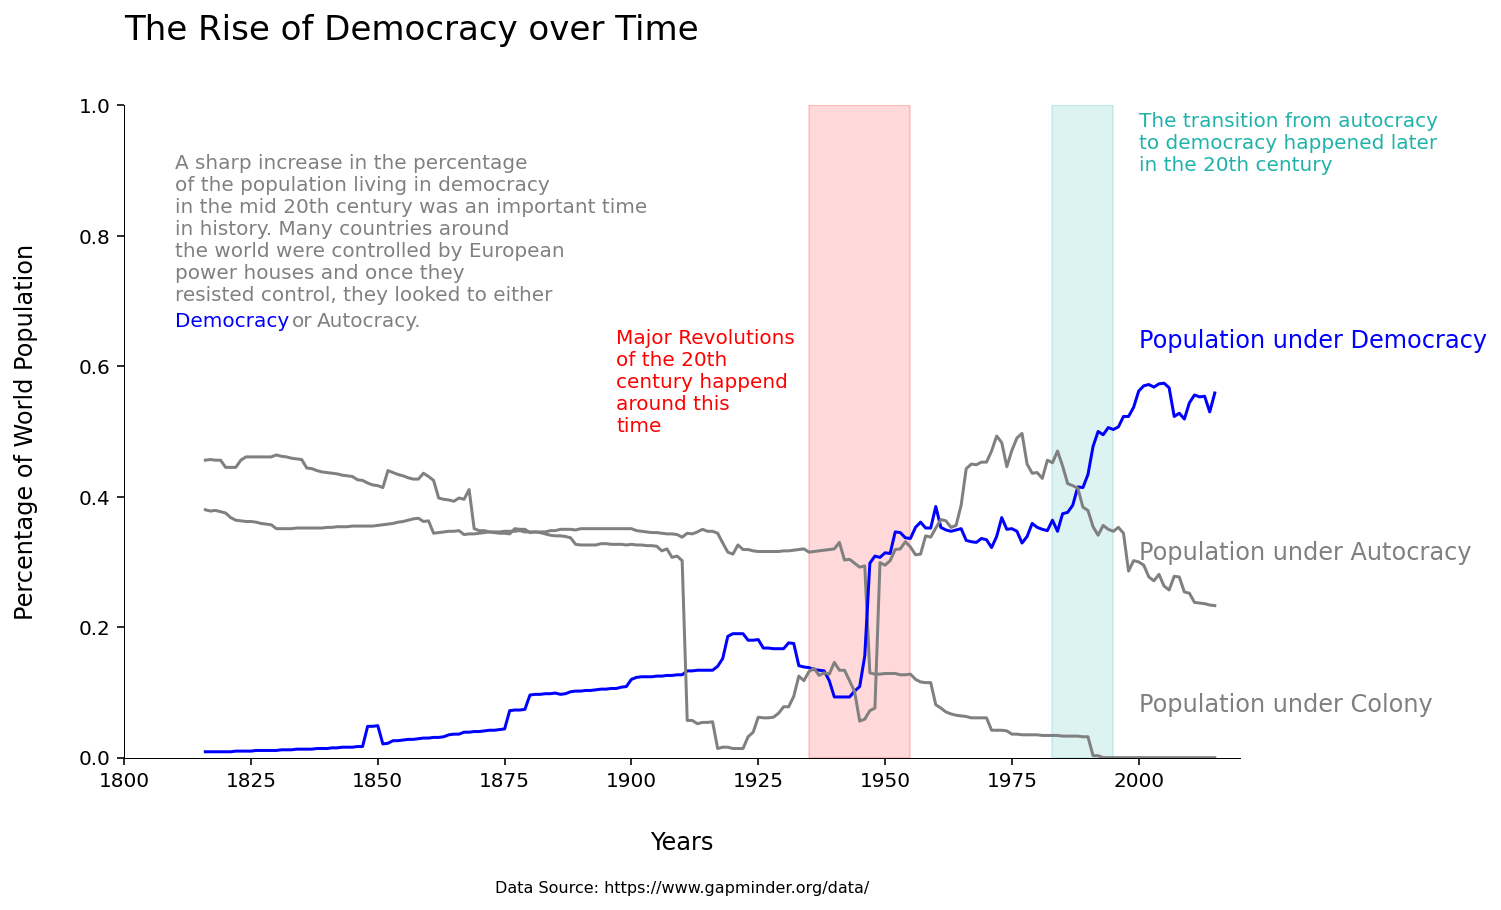

In [33]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.set_ylim(0, 1)
ax.set_xlim(1800, 2020)

ax.text(1800, 1.1, "The Rise of Democracy over Time", fontsize = 17)
ax.set_xlabel("Years", fontsize = 12, labelpad = 20)
ax.set_ylabel("Percentage of World Population", fontsize = 12, labelpad = 20)
plot_line(ax, "Colony", "grey")
plot_line(ax, "Democracy", "blue")
plot_line(ax, "Autocracy", "gray")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.spines['left'].set_linewidth(.5)

plt.fill_between([1935, 1955], [1, 1], 0,
                 facecolor="red", # The fill color
                 color='red',       # The outline color
                 alpha=0.15)
ax.text(1897, 0.5, "Major Revolutions \nof the 20th \ncentury happend \naround this \ntime", color = "red")

ax.text(1810, 0.7, "A sharp increase in the percentage \nof the population living in democracy \nin the mid 20th century was an important time \nin history. Many countries around \nthe world were controlled by European \npower houses and once they \nresisted control, they looked to either ", 
       color = "grey")
ax.text(1810, 0.66, "Democracy", color = "blue")
ax.text(1833, 0.66, "or", color = "grey")
ax.text(1838, 0.66, "Autocracy.", color = "grey")

plt.fill_between([1983, 1995], [1, 1], 0,
                 facecolor="chocolate", # The fill color
                 color='lightseagreen',       # The outline color
                 alpha=0.15)
ax.text(2000, 0.9, "The transition from autocracy \nto democracy happened later \nin the 20th century", 
       color = "lightseagreen")

ax.text(1910, -.2, "Data Source: https://www.gapminder.org/data/", horizontalalignment = 'center', 
        verticalalignment = 'center', fontsize = 8)


plt.show()